# Heart Attack/ Ataque no coração
Sugestão:
1. Análise Descritiva das Variáveis.
2. Análise de relação entre variáveis.
3. Visualização das análises.
4. Regressão logística.

Objetivo:
- Criar modelo de regressão logística para classificação de forma a maximizar o “Score F1” no conjunto de teste.

Entrega:
- Arquivo .csv com apenas uma coluna dos valores alvo estimados {0,1} . (com a mesma sequência do conj. que foi entregue



In [ ]:
import pandas as pd # Importacao do pandas
import numpy as np # Importacao do numpy
import matplotlib.pyplot as plt # Importacao do matplotlib
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 100
import seaborn as sns # Importacao do sns
from google.colab import drive


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MaksonViini/Teste/master/arquivos/heart_train.csv')

In [ ]:
df.describe() # exibindo dados estatísticos do dataset de treino

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,208.000000,208.000000,208.000000,208.000000,208.00000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,53.802885,0.677885,0.995192,131.634615,248.56250,0.134615,0.538462,149.326923,0.326923,0.979808,1.427885,0.697115,2.307692,0.538462
std,9.346502,0.468414,1.028566,17.050115,54.97743,0.342136,0.527927,23.141423,0.470221,1.055822,0.593517,1.026034,0.582796,0.499721
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,212.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.500000,1.000000,1.000000,130.000000,241.50000,0.000000,1.000000,152.000000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,564.00000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.shape

(208, 14)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       208 non-null    int64  
 1   sex       208 non-null    int64  
 2   cp        208 non-null    int64  
 3   trestbps  208 non-null    int64  
 4   chol      208 non-null    int64  
 5   fbs       208 non-null    int64  
 6   restecg   208 non-null    int64  
 7   thalach   208 non-null    int64  
 8   exang     208 non-null    int64  
 9   oldpeak   208 non-null    float64
 10  slope     208 non-null    int64  
 11  ca        208 non-null    int64  
 12  thal      208 non-null    int64  
 13  target    208 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 22.9 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c749ba278>,
      dtype=object)

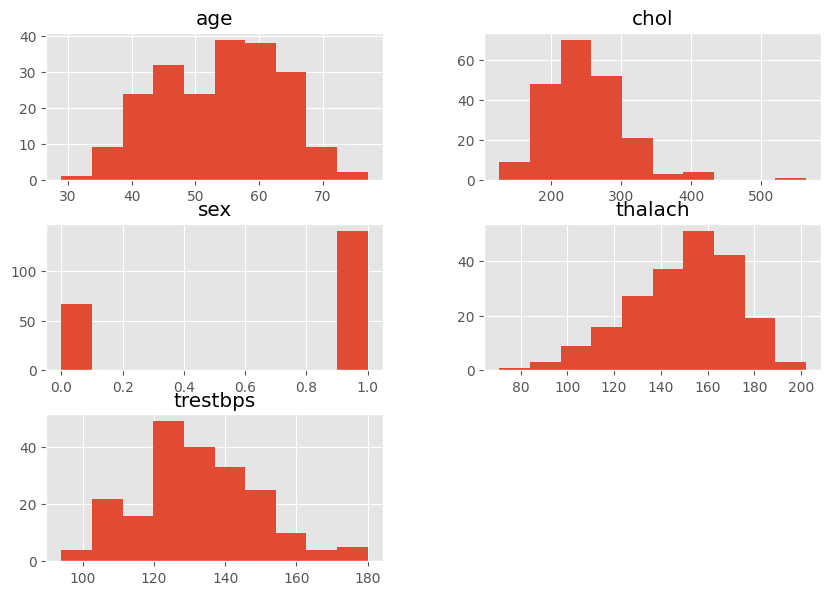

In [ ]:
df[['age', 'sex', 'chol', 'thalach', 'trestbps']].hist()

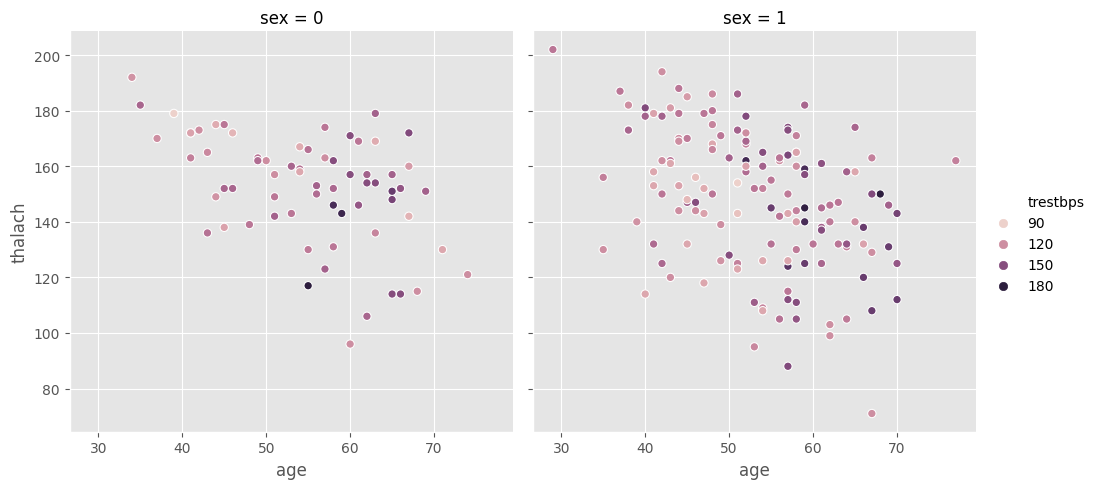

In [ ]:
sns.relplot(x='age', y='thalach', col='sex', hue='trestbps', data=df) # Relacao idade, sexo com pressão arterial em repouso e frequência cardíaca máxima atingir

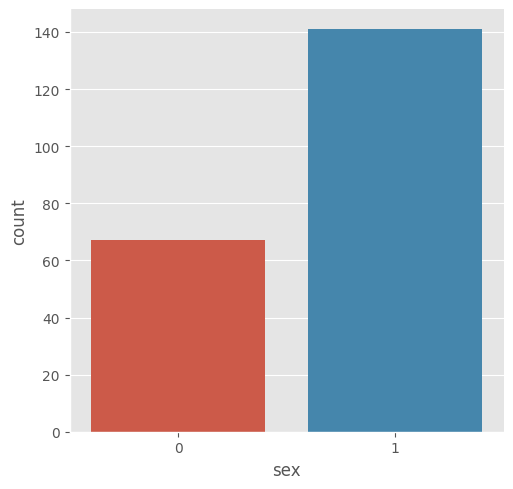

In [ ]:
sns.catplot(x='sex', kind='count', data=df)

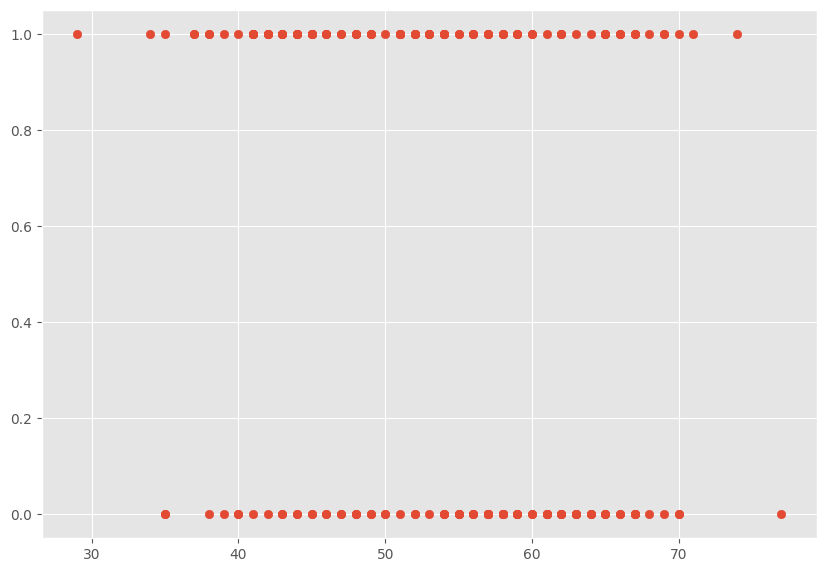

In [ ]:
plt.style.use("ggplot")
plt.scatter(df['age'], df['target'])

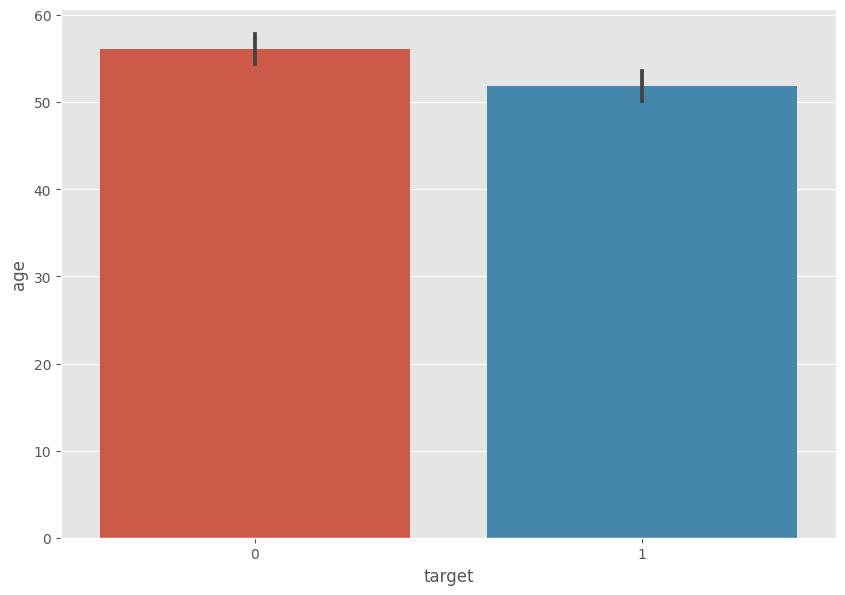

In [ ]:
sns.barplot(x='target', y='age', data=df) # Relacao de idade com casos

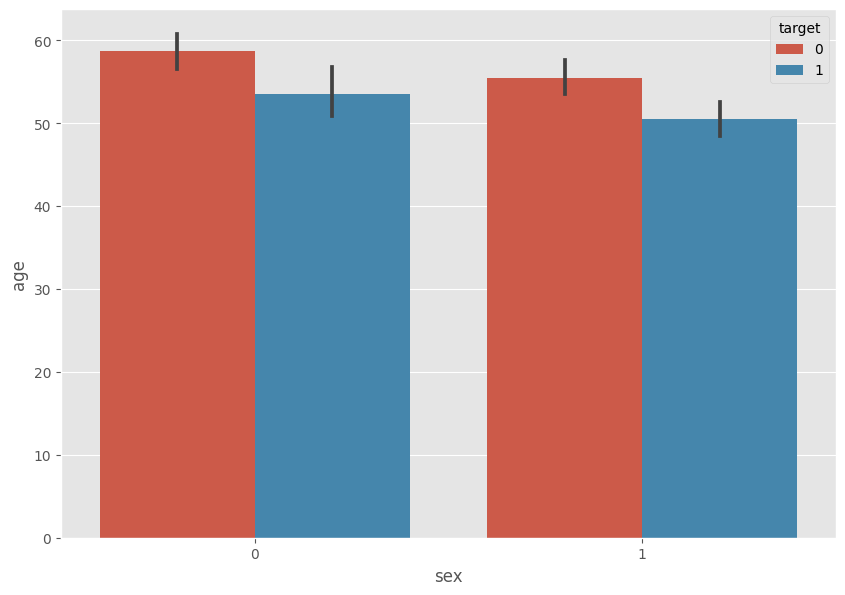

In [ ]:
sns.barplot(x='sex', y='age', hue='target', data=df) # Contagem dos casos de acordo com sexo e idade

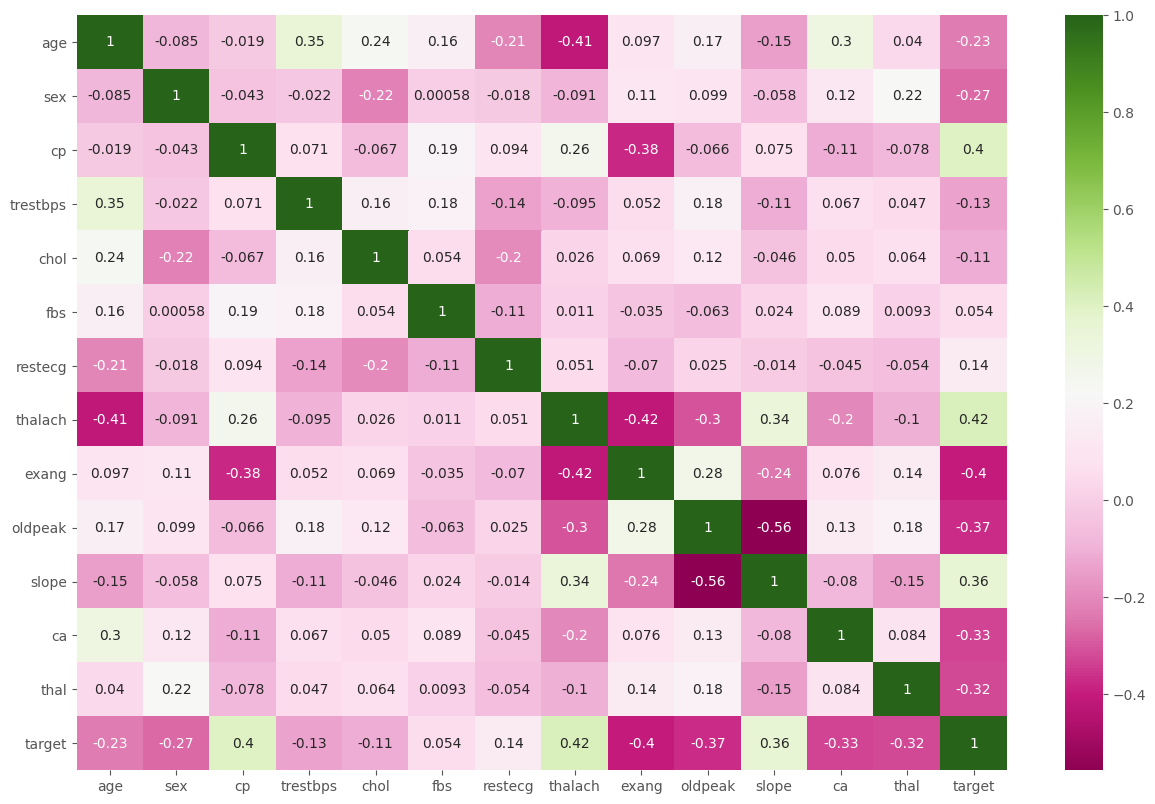

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.corr(), annot=True, cmap="PiYG") # Correlacao dos dados

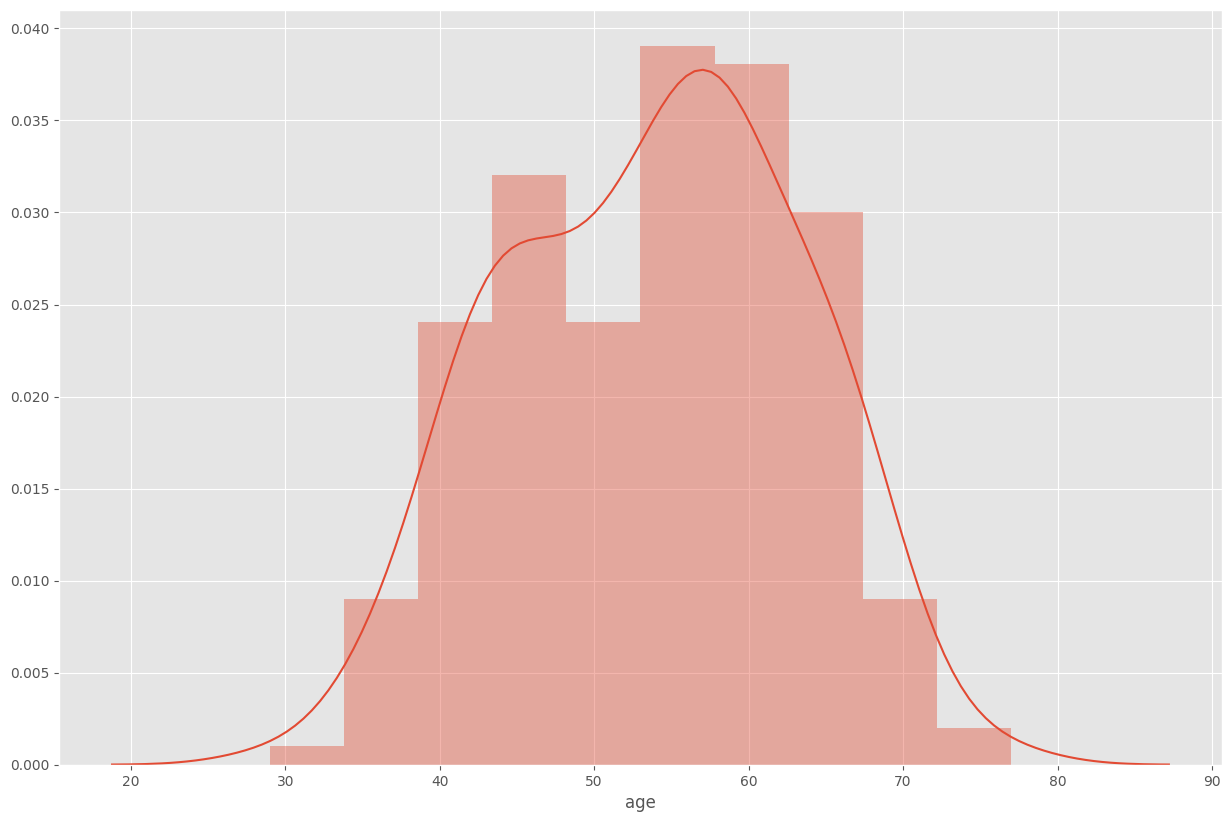

In [ ]:
sns.distplot(df['age']) # Distribuicao da idade

([<matplotlib.patches.Wedge at 0x7f9c742e0a90>,
 [Text(-0.5832243279613082, 0.9326571627742322, 'Male'),
  Text(0.5832244152829714, -0.9326571081688254, 'Female')],
 [Text(-0.31812236070616806, 0.5087220887859448, '67.79%'),
  Text(0.31812240833616623, -0.5087220590011775, '32.21%')])

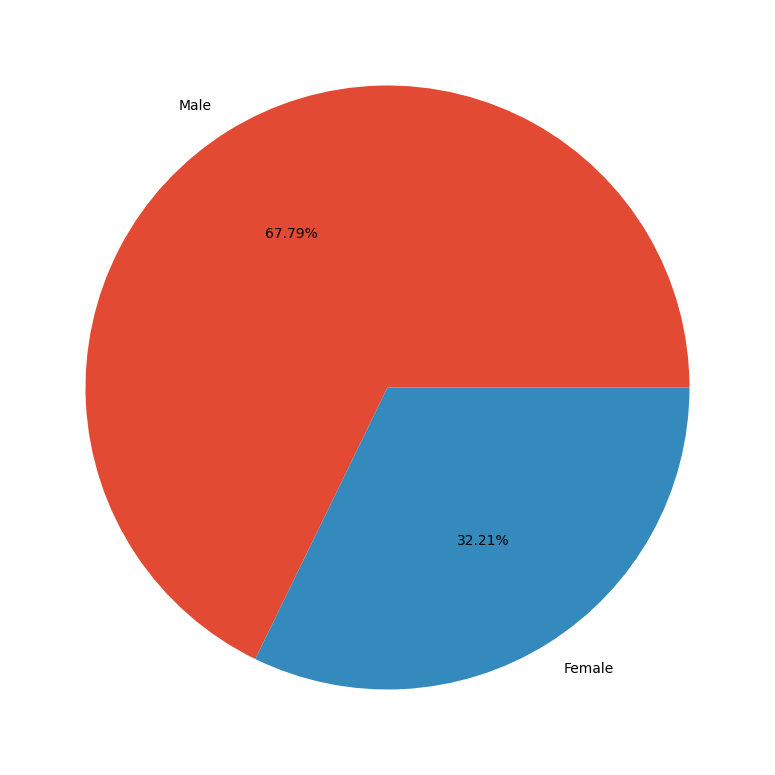

In [ ]:
size = df['sex'].value_counts()
labels = 'Male', 'Female'
plt.pie(size, labels=labels, autopct='%.2f%%') # Distribuicao pelo sexo

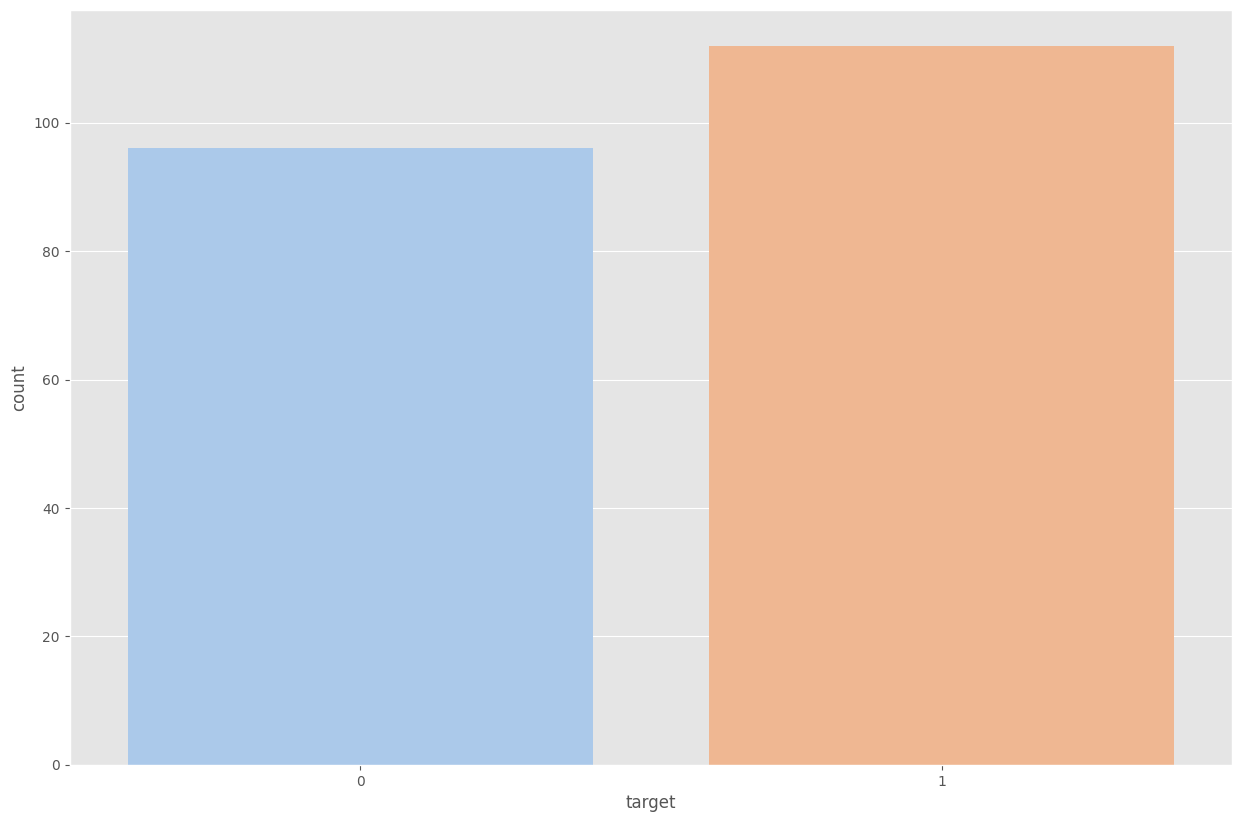

In [ ]:
sns.countplot(x='target', palette='pastel', data=df) # Contagem dos casos da coluna alvo

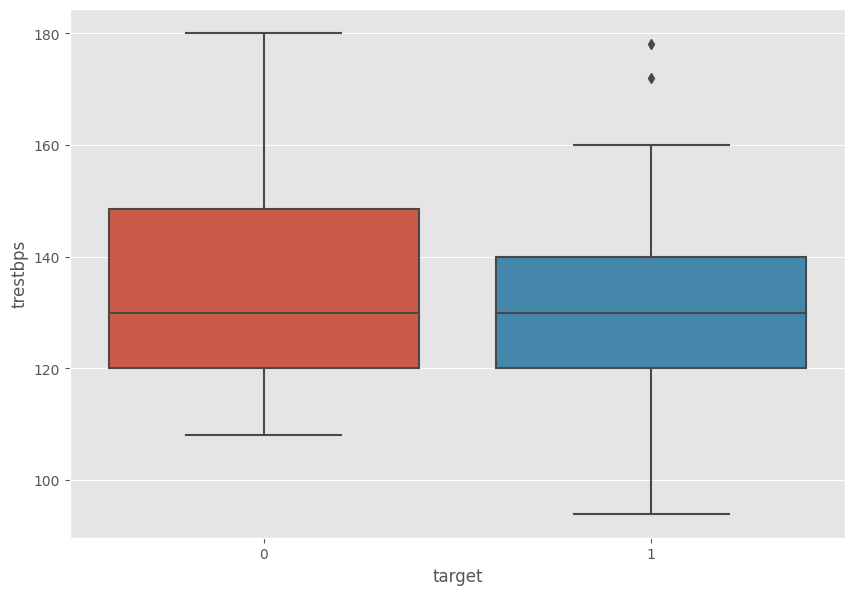

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x='target', y='trestbps', data=df) # Relacao dos dados target com pressão arterial em repouso

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
1,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
2,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
3,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
4,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0


# **Treinando modelo de Regressão Logística**

In [ ]:
# Carregando as bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, log_loss, confusion_matrix

In [ ]:
#Verificando se os dados estão desbalanceados
df["target"].value_counts()

1    112
0     96
Name: target, dtype: int64

In [ ]:
# De acordo com o heatmap irei montar um dataset com as features que mais se relacionam com o target
cols = ["cp","fbs","restecg","thalach","slope"]
df_reglog = df[cols]
df_reglog

,cp,fbs,restecg,thalach,slope
0,0,0,0,114,1
1,0,0,0,112,1
2,1,0,1,163,2
3,2,0,1,170,2
4,0,0,1,99,1
...,...,...,...,...,...
203,0,0,0,111,2
204,0,0,0,171,2
205,0,0,0,162,2
206,0,0,0,145,1


In [ ]:
df_reglog.shape

(208, 5)

In [ ]:
# Definindo meus dados de feature e target
X = df_reglog
y = df['target']

In [ ]:
# Dividindo meus dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# Treinando com regressão logística
logreg = LogisticRegression(penalty='none', solver='newton-cg').fit(X_train, y_train)

In [ ]:
# Definindo escala no conjunto de treino
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [ ]:
# Imprimindo o coeficiente de interceptação
print('Intercept: ' + str(logreg.intercept_[0]))

Intercept: -7.671578927192697


In [ ]:
# Imprimindo o coeficiente de regressão
logreg.coef_[0]

array([ 0.61607984, -0.46573948,  0.64964589,  0.03419225,  1.25943524])

In [ ]:
# Prevendo a probabilidade
X_test=scaler.transform(X_test)

y_probab = logreg.predict_proba(X_test)

y_probab.shape

(63, 2)

In [ ]:
# Analise de log_loss
log_loss(y_test,y_probab)

3.9721788152542623

o Log Loss ficou com um valor alto, pois deve se aproximar do valor 1

## **Regularização dos dados**

In [ ]:
X = df_reglog
y = df['target']

In [ ]:
# Dividindo novamente meus dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# Importando novas bibliotecas
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
# Escolhendo hiperparametro
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('logreg', LogisticRegression(penalty='l1',solver='liblinear'))])

parameters = {'logreg__C': np.linspace(10**-5,10,100)}
 
gcv=GridSearchCV(pipe, parameters, cv=3, scoring='neg_log_loss', n_jobs=-1)
gcv.fit(X_train, y_train)

#Vendo o melhor valor e o escore associado
c=gcv.best_params_['logreg__C']

c, gcv.best_score_

(1.61617, -0.5294148138847803)

In [ ]:
# Treinando e gerando valores preditos
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('logreg', LogisticRegression(penalty='l1', C=c, solver='liblinear'))])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logreg',
                 LogisticRegression(C=1.61617, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
pipe['logreg'].intercept_[0]

0.17691323573915316

In [ ]:
pipe['logreg'].coef_[0]

array([ 0.58954224, -0.12216015,  0.32026445,  0.76823433,  0.7161324 ])

In [ ]:
# Gerando valores preditos com os dados de teste
y_probab = pipe.predict_proba(X_test)
y_probab = y_probab[:,1]

In [ ]:
# Valor do erro no teste
log_loss(y_test,y_probab) # MARAVILHA !!!

0.5384236856702918

In [ ]:
# Classificação das probabilidades em 0 ou 1
corte=.1

y_pred=1*(y_probab > corte)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

Gerando a matriz de confusão para avaliação do modelo

In [ ]:
cf_matrix=confusion_matrix(y_test, y_pred)

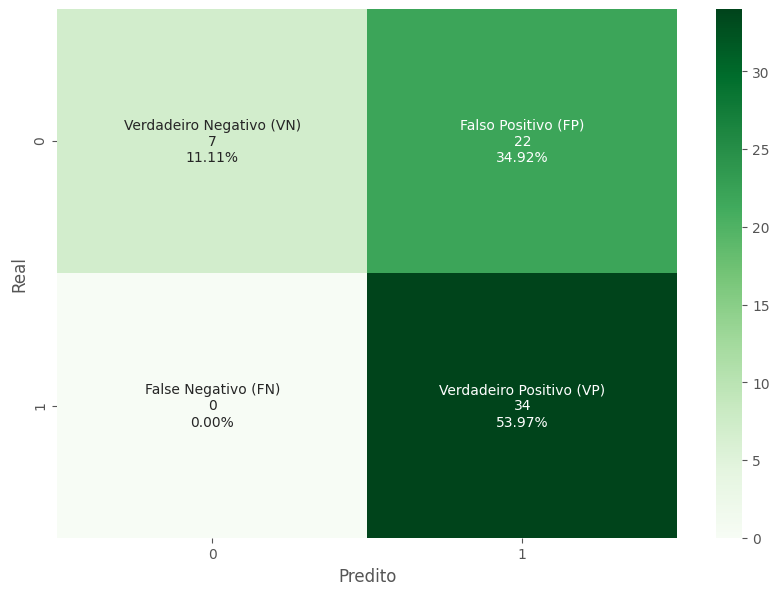

In [ ]:
group_names = ['Verdadeiro Negativo (VN)','Falso Positivo (FP)','False Negativo (FN)','Verdadeiro Positivo (VP)']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

In [ ]:
# Gerando o report
report=classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.24      0.39        29
           1       0.61      1.00      0.76        34

    accuracy                           0.65        63
   macro avg       0.80      0.62      0.57        63
weighted avg       0.79      0.65      0.59        63



In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

Gerando exportação dos dados

In [55]:
df_total_exp =pd.DataFrame(y_pred, columns=['Target']) 

In [56]:
from google.colab import files
df.to_csv('HeartAttack.csv') 
files.download('HeartAttack.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>